In [ ]:
# [f"{round(lr.coef_[0][i], 3)}*{X.columns[i]} +"                      for i in range(13)]
# This is straight equation - from Linear Regression 
# 3.4*CRIM + 4.1*AGE + ....   + lr.intercept_ = PRICE

In [1]:
print(f"Life is awesome")

Life is awesome


In [4]:
person = "Roy"
print(f"{person.upper()}'s life is awesome! Some 3 + 4 = {3 + 4}")

ROY's life is awesome! Some 3 + 4 = 7


In [ ]:
#f - formatted strings

In [5]:
# Confusion Matrix

In [6]:
#1. Overall accuracy in a myth, indivisual category accuracy can be obtained by CM 
#2. We can also find (overlapping categories) - In which categories is the model getting confused! 
#3. Get a perception from both model's (PRECISION)as well as data's(RECALL) 

In [7]:
# Area | Bedroom | Parking (Y/N) | PRICE
# Area & Bedroom - Numerical features 
# Parking        - Categorical feature 

In [8]:
#Converting categorical features into numerical
# Parking | Parking_cont 
# Y       |     1
# Y       |     1  
# N       |     0 
# N       |     0 
# Y       |     1 

In [9]:
# Gender (M/F/O) | Gender_cont
# M              | 0
# O              | 1
# F              | 2
# O              | 1 
# F              | 2
# F              | 2
# M              | 0 
# 0,1,2 is not a correct representation of categories as 2 has more numerical value as compared to 1 
# Model will start giving more weightage to 2 as compared to 0 and 1 

In [ ]:
# !!!  ONE HOT ENCODING   !!!
# Gender (M/F/O) | Gender_M | Gender_F | Gender_O
# M              | 1        | 0        | 0
# O              | 0        | 0        | 1
# F              | 0        | 1        | 0
# O              | 0        | 0        | 1 
# F              | 0        | 1        | 0
# F              | 0        | 1        | 0
# M              | 1        | 0        | 0

In [10]:
# n * 0 = 0
# n * 1 = n 

In [11]:
import pandas as pd 
import numpy as np 
df = pd.DataFrame()
gender = ["Male", "Female", "Others"]
df["Gender"] = np.random.choice(gender, 10) # randomly select from gender list 10 times
df

Gender
0  Others
1  Female
2  Others
3  Female
4  Others
5  Others
6  Female
7  Others
8    Male
9    Male

In [12]:
pd.get_dummies(df)

Gender_Female  Gender_Male  Gender_Others
0              0            0              1
1              1            0              0
2              0            0              1
3              1            0              0
4              0            0              1
5              0            0              1
6              1            0              0
7              0            0              1
8              0            1              0
9              0            1              0

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
ohe = OneHotEncoder()

In [18]:
ohe_out = ohe.fit_transform(df[["Gender"]])

In [20]:
ohe_out

<10x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [19]:
ohe_out.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [21]:
df["Gender_col1"] = None
df["Gender_col2"] = None
df["Gender_col3"] = None
df.loc[:, ["Gender_col1", "Gender_col2", "Gender_col3"]] = ohe_out.toarray()

In [22]:
df

Gender col1 col2 col3
0  Others    0    0    1
1  Female    1    0    0
2  Others    0    0    1
3  Female    1    0    0
4  Others    0    0    1
5  Others    0    0    1
6  Female    1    0    0
7  Others    0    0    1
8    Male    0    1    0
9    Male    0    1    0

In [25]:
# You can drop the Gender column now from dataframe
df.drop(columns=["Gender"])

col1 col2 col3  Age
0    0    0    1   77
1    1    0    0   43
2    0    0    1   29
3    1    0    0   85
4    0    0    1   48
5    0    0    1   57
6    1    0    0   93
7    0    0    1   55
8    0    1    0   85
9    0    1    0   42

In [23]:
df["Age"] = np.random.randint(18, 95, 10)

In [24]:
df

Gender col1 col2 col3  Age
0  Others    0    0    1   77
1  Female    1    0    0   43
2  Others    0    0    1   29
3  Female    1    0    0   85
4  Others    0    0    1   48
5  Others    0    0    1   57
6  Female    1    0    0   93
7  Others    0    0    1   55
8    Male    0    1    0   85
9    Male    0    1    0   42

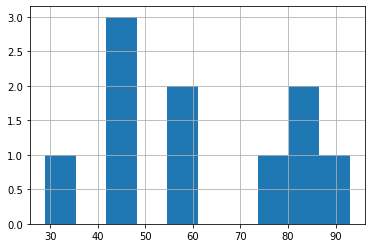

In [26]:
df.Age.hist()

In [27]:
# Cont Variables we need to scale them in a range
# Normalization - 
# 1. Divide with maximum number 
df.Age/df.Age.max()

0    0.827957
1    0.462366
2    0.311828
3    0.913978
4    0.516129
5    0.612903
6    1.000000
7    0.591398
8    0.913978
9    0.451613
Name: Age, dtype: float64

In [28]:
# 2. MinMaxScaling 
# (x - x_min)/(x_max - x_min)

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit_transform(df[["Age"]])

array([[0.75    ],
       [0.21875 ],
       [0.      ],
       [0.875   ],
       [0.296875],
       [0.4375  ],
       [1.      ],
       [0.40625 ],
       [0.875   ],
       [0.203125]])

In [29]:
?MinMaxScaler

In [30]:
df["Salary"] = np.random.randint(56, 700, 10)

In [31]:
df

Gender col1 col2 col3  Age  Salary
0  Others    0    0    1   77     654
1  Female    1    0    0   43     147
2  Others    0    0    1   29     236
3  Female    1    0    0   85     261
4  Others    0    0    1   48      70
5  Others    0    0    1   57     120
6  Female    1    0    0   93     333
7  Others    0    0    1   55     508
8    Male    0    1    0   85     361
9    Male    0    1    0   42     254

In [32]:
df.Salary / df.Salary.max()

0    1.000000
1    0.224771
2    0.360856
3    0.399083
4    0.107034
5    0.183486
6    0.509174
7    0.776758
8    0.551988
9    0.388379
Name: Salary, dtype: float64

In [ ]:
#the normalization is to bring all features to a common scale while preserving 
#the relationship between values withing the same feature

In [33]:
# 3. Standard Scaling 
# (x - x_mean)/(x_std)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(df[["Age"]])

array([[ 0.74707023],
       [-0.88115976],
       [-1.55160741],
       [ 1.13018317],
       [-0.64171418],
       [-0.21071212],
       [ 1.51329611],
       [-0.30649035],
       [ 1.13018317],
       [-0.92904888]])

In [34]:
?StandardScaler